In [71]:
import random

from DrawSolution import draw_all_pallets
from UnderstandPallets import understand_pallets
from class_item import Item
from class_population import Permutation
import copy
import time
import random
from matplotlib import pyplot as plt
from matplotlib import patches


eps = 1

poligon1 = [[0,1,0], [1,1,1], [0,1,0]]
poligon2 = [[1,1], [1,0]]
poligon3 = [[1,1,1], [0,1,0]]

points_1 = [[0,3], [2,0], [3,1], [2,1], [1, 4]]
points_2 = [[0,0], [1,0], [1,8], [0,8]]
points_3 = [[0,3], [2,0], [2,1], [3,2], [1, 4]]

poligon_matrix = [[1,1,1,1], [1,1,1,1], [1,1,1,1]]
short_poligon_matrix = [[1,1,1,1,1,1,1,1]]

poligons = [copy.deepcopy(points_2), copy.deepcopy(points_2), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1)]

# poligons = [copy.deepcopy(points_2),copy.deepcopy(points_2)]
items = [Item(i, poligons[i]) for i in range(len(poligons))]



items[0].matrix = short_poligon_matrix
items[1].matrix = short_poligon_matrix




for item in items:
    if item.matrix is None:
        item.matrix = poligon_matrix

matrix = [[0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0]]


In [72]:


def find_lb_coordinates(items, eps):
    for item in items:
        item.lb_x = item.lb_x * eps
        item.lb_y = item.lb_y * eps
    return items

def fit_item(pallet, item):
    for i in range(len(pallet[0])):
        for j in range(len(pallet)):
            exit = False
            # условия, что объект влезает
            if len(item.matrix) + i <= len(pallet) and len(item.matrix[0]) + j <= len(pallet[0]):
                # располагаем объект
                for p in range(len(item.matrix)):
                    for k in range(len(item.matrix[0])):
                        # решаем есть ли пересечение
                        if pallet[i+p][j+k] + item.matrix[p][k] == 2:
                            exit = True
                            break
                    if exit:
                        break
            else:
                exit = True
            # если пересечений нет и элемент влезает, то добавляем его
            if not exit:
                item.lb_x = i
                item.lb_y = j
                for p in range(len(item.matrix)):
                    for k in range(len(item.matrix[0])):
                        pallet[i+p][j+k] += item.matrix[p][k]
                break
        if not exit:
            break

    return pallet, exit

def fit_pallets(matrix, items, eps):
    pallets = []
    pallets.append(copy.deepcopy(matrix))
    for item in items:
        i=0
        exit = True
        while exit and i<len(pallets):
            pallets[i], exit = fit_item(pallets[i], item)
            if exit and i==(len(pallets)-1):
                pallets.append(copy.deepcopy(matrix))
            if not exit:
                item.pallet_number = i
                # print(i)
            i+=1
    find_lb_coordinates(items, eps)

    return pallets, items

In [73]:
def swap(list, pos1, pos2):

    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

def locSearch(matrix, poligons, eps):

    n = len( poligons)

    objVal = len(fit_pallets(matrix,  poligons, eps))

    poligonsBest = copy.deepcopy(poligons)

    betterNeighboor = (0,0)
    new_poligons = []
    stop = False
    while not stop:
        stop = True
        for i in range(n):
            for j in range(i + 1, n):
                pal, new_poligons = fit_pallets(matrix, swap(copy.deepcopy(poligonsBest), i, j), eps)
                val = len(pal)
                if val < objVal:
                    stop = False
                    objVal = val
                    betterNeighboor = (i,j)
                    poligons = new_poligons

                if betterNeighboor[1] != 0:
                    swap( poligonsBest, betterNeighboor[0], betterNeighboor[1])

    return poligons

In [74]:
def crossover_type1(parent1, parent2):
    child = parent1[:int(len(parent1)/2)]
    for i in range(len(parent1)):
        if parent2[i] not in child:
            child.append(parent2[i])
    # print([parent1[i].id for i in range(len(parent1))])
    # print([parent2[i].id for i in range(len(parent1))])
    # print([child[i].id for i in range(len(parent1))])
    return child

def crossover_type2(parent1, parent2):
    child = parent2[:int(len(parent2)/2)]
    for i in range(len(parent1)):
        if parent1[i] not in child:
            child.append(parent1[i])
    # print([parent1[i].id for i in range(len(parent1))])
    # print([parent2[i].id for i in range(len(parent1))])
    # print([child[i].id for i in range(len(parent1))])
    # print('-------------')
    return child

In [75]:
record = len(items) # ограничение сверху на количество паллет
record_permutation = 0

population = []

k = 10 # размер изначальной популяции

# создаём начальную случайную популяцию и находим её рекорд
for i in range(k):
    population.append(copy.deepcopy(Permutation(sorted(items, key=lambda A: random.random()))))
    result = fit_pallets(matrix, population[i].items, eps)
    population[i].value = len(result)
    print(population[i].value)
    if record > len(result):
        record = len(result)
        record_permutation = population[i]

# удаляем из списка рекорд
population.remove(record_permutation)

2
2
2
2
2
2
2
2
2
2


In [76]:
champions = population
sorted(champions, key=lambda champion: champion.value)
start_time = time.time()
work_time = 0
find_best = True
while work_time < 1: # ограничение по времени работы 10 секунд
    # создаём новую популяцию, если чемпион новый
    if find_best:
        population = []
        for parent in champions:
            child_1 = crossover_type1(record_permutation.items, parent.items)
            child_2 = crossover_type2(record_permutation.items, parent.items)
            population.append(Permutation(child_1, value= len(fit_pallets(matrix, child_1, eps))))
            population.append(Permutation(child_2, value= len(fit_pallets(matrix, child_2, eps))))
    # создаём новую популяцию, если чемпион старый
    else:
        old_population = copy.deepcopy(population)
        population = []
        for parent in old_population:
            child_1 = crossover_type1(record_permutation.items, parent.items)
            child_2 = crossover_type2(record_permutation.items, parent.items)
            child_1 = locSearch(matrix, copy.deepcopy(child_1), eps)
            child_2 = locSearch(matrix, copy.deepcopy(child_2), eps)
            population.append(Permutation(child_1, value= len(fit_pallets(matrix, child_1, eps))))
            population.append(Permutation(child_2, value= len(fit_pallets(matrix, child_2, eps))))
    find_best = False
    # чистим и сортируем всех новых особей
    for permutation in population:
        # удаляем повторы
        if permutation == record_permutation or permutation in champions or population.count(permutation)>1:
            population.remove(permutation)
        # если мы получили лучшую
        elif permutation.value < record_permutation.value:
            population.append(record_permutation)
            record_permutation = permutation
            population.remove(record_permutation)
            find_best = True
    # пересматриваем чемпионов
        if permutation.value < champions[0].value:
            champions.remove(champions[0])
            champions.append(copy.deepcopy(permutation))
            population.remove(permutation)
            sorted(champions, key=lambda champion: champion.value)

    work_time = time.time() - start_time

36


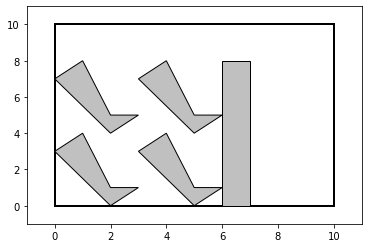

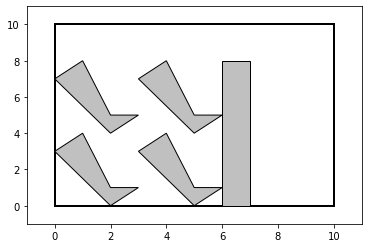

In [77]:
print(len(population))
pal, items = fit_pallets(matrix, record_permutation.items, eps)
draw_all_pallets(understand_pallets(items), 10, 10)
